# Proyek Analisis Data : Bike Sharing
- **Nama:** Azzah Nabila Herdy
- **Email:** azzah8872@gmail.com/m246b4kx0778@bangkit.academy
- **ID Dicoding:** azzah2304

## Menentukan Pertanyaan Bisnis

- Paling banyak sepeda disewa pada jam berapa dalam sehari?
- Hari apa yang menunjukkan jumlah penyewaan sepeda tertinggi dalam seminggu?
- Apakah ada perbedaan besar dalam penyewaan sepeda antara weekday dan weekend?

## Import Semua Packages/Library yang Digunakan

In [388]:
pip install numpy pandas scipy matplotlib seaborn jupyter

## Data Wrangling

### Gathering Data

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
# Tabel hari
day_df = pd.read_csv("https://raw.githubusercontent.com/Azzah2323/projek/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [391]:
# Tabel jam
hour_df = pd.read_csv("https://raw.githubusercontent.com/Azzah2323/projek/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [392]:
combined_df = pd.merge(hour_df, day_df, on=['dteday', 'season', 'yr', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit'], suffixes=('_hour', '_day'))


In [393]:
print("\nStatistical summary of the combined dataset:")
print(combined_df.describe())


Statistical summary of the combined dataset:
       instant_hour        season            yr          mnth            hr  \
count  12880.000000  12880.000000  12880.000000  12880.000000  12880.000000   
mean    8767.884239      2.526165      0.505978      6.602329     11.525466   
std     4998.003068      1.107092      0.499984      3.429717      6.770090   
min        6.000000      1.000000      0.000000      1.000000      0.000000   
25%     4534.750000      2.000000      0.000000      4.000000      6.000000   
50%     8742.500000      3.000000      1.000000      7.000000     12.000000   
75%    13087.250000      3.000000      1.000000     10.000000     17.000000   
max    17376.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit     temp_hour  \
count  12880.000000  12880.000000  12880.000000  12880.000000  12880.000000   
mean       0.031366      2.984860      0.672981      1.285171      0.500227   
std  

In [394]:
combined_df['weekend'] = combined_df['weekday'].apply(lambda x: 1 if x == 0 or x == 6 else 0)

**Insight:**
- Membuat empat tabel dari sebuah dataset yang diperoleh dari repository
- Ada dua dataset yaitu day dan hour
- Tahap ini yaitu membuat tabel yaitu guna mengumpulkan dan mempersiapkan data sebelum dilakukan analisis lebih lanjut.
- Mendapatkan data lengkap yang akan memudahkan untuk langkah analisis berikutnya

### Assessing Data

In [395]:
# Menilai data day
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [396]:
print(day_df[['season', 'weathersit', 'holiday', 'workingday']].nunique())
print(day_df[['season', 'weathersit', 'holiday', 'workingday']].drop_duplicates())

season        4
weathersit    3
holiday       2
workingday    2
dtype: int64
     season  weathersit  holiday  workingday
0         1           2        0           0
2         1           1        0           1
6         1           2        0           1
8         1           1        0           0
16        1           2        1           0
25        1           3        0           1
79        2           2        0           1
80        2           1        0           1
84        2           1        0           0
85        2           2        0           0
89        2           3        0           1
104       2           1        1           0
105       2           3        0           0
171       3           2        0           1
172       3           1        0           1
175       3           1        0           0
183       3           2        0           0
184       3           2        1           0
248       3           3        0           1
265       4           2

In [397]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [398]:
# Menilai data hour
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [399]:
print(hour_df[['temp', 'hum', 'windspeed']].describe())

               temp           hum     windspeed
count  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098
std        0.192556      0.192930      0.122340
min        0.020000      0.000000      0.000000
25%        0.340000      0.480000      0.104500
50%        0.500000      0.630000      0.194000
75%        0.660000      0.780000      0.253700
max        1.000000      1.000000      0.850700


In [400]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Menilai data yang telah diperoleh dari proses data wrangling
- Terdapat format data yang tidak sesuai, hal ini harus diperbaiki agar sesuai dengan ketentuan
- Penilaian dilakukan untuk mengetahui apakah ada data yang tidak sesuai. Terdapat pengecekan duplikasi, missing value, tipe data dan pengecekan kesalahan input data
- Penggunaan file CSV yang digunakan pada dataset dan URL eksternal yang digunakan untuk mempermudah memperoleh data yang lebih besar dan terstruktur

### Cleaning Data

In [401]:
# Membersihkan data day
# Mengubah tipe data dteday

day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%Y-%m-%d', errors='coerce')


In [402]:
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [403]:
# Membersihkan data hour
# Mengubah tipe data dteday

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d', errors='coerce')


In [404]:
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [405]:
combined_df = pd.merge(hour_df, day_df, on=['dteday', 'season', 'yr', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit'], suffixes=('_hour', '_day'))


In [406]:
combined_df['weekend'] = combined_df['weekday'].apply(lambda x: 1 if x == 0 or x == 6 else 0)


**Insight:**
- Setelah data di assessment tahap selanjutnya yaitu data cleaning dimana pada tahap ini data diperiksa apakan ada kesalahan input data dan sebagainya
- Tidak ada duplikasi yang terjadi pada data diatas
- Terdapat format data yang tidak sesuai, hal ini harus diperbaiki agar sesuai dengan ketentuan

## Exploratory Data Analysis (EDA)

### Explore data day


In [407]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [408]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [409]:
hourly_rentals = combined_df.groupby('hr')['cnt_hour'].mean()

In [410]:
# Penyewa terbanyak
max_rentals_hour = hourly_rentals.idxmax()
print("Hour with the most bike rentals: ", max_rentals_hour)

Hour with the most bike rentals:  17


In [411]:
# Penyewa dalam seminggu
weekday_rentals = combined_df.groupby('weekday')['cnt_hour'].mean()

# Display the result
print("\nAverage bike rentals by day of the week:")
print(weekday_rentals)


Average bike rentals by day of the week:
weekday
0    183.704240
1    190.727471
2    198.174353
3    199.761333
4    204.573138
5    207.358617
6    197.025080
Name: cnt_hour, dtype: float64


In [412]:
# Hari terbanya penyewa dalam seminggu
max_rentals_day = weekday_rentals.idxmax()
weekday_names = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
print(f"Hari dengan penyewaan sepeda tertinggi: {weekday_names[max_rentals_day]}")

Hari dengan penyewaan sepeda tertinggi: Jumat


In [413]:
weekend_rentals = combined_df.groupby('weekend')['cnt_hour'].mean()
print("\nRata-rata penyewaan sepeda:")
print(f"Rata-rata penyewaan pada hari kerja: {weekend_rentals[0]}")
print(f"Rata-rata penyewaan pada akhir pekan: {weekend_rentals[1]}")



Rata-rata penyewaan sepeda:
Rata-rata penyewaan pada hari kerja: 200.1039462081129
Rata-rata penyewaan pada akhir pekan: 190.25971638655463


**Insight:**
- Memahami struktur data yang terdapat pada masing-masing tabel, karena setiap tabel memiliki struktur dan karakteristik yang berbeda
- Mendapatkan gambaran distribusi nilai setiap kolom dengan melakukan statistik describe
- Mengdistribusikan variabel kategori untuk menganalisis tabel berdasarkan kategori

## Visualization & Explanatory Analysis

### Pertanyaan 1: Paling banyak sepeda disewa pada jam berapa dalam sehari?

<ipython-input-414-159f17a6ab8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

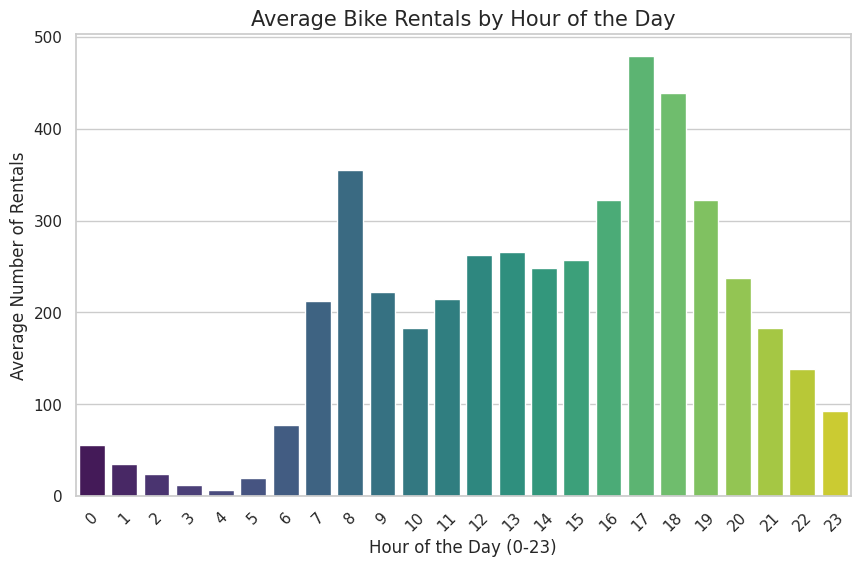

In [414]:
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values, palette="viridis")
plt.title('Average Bike Rentals by Hour of the Day', fontsize=15)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Paling banyak sepeda disewa perhari dalam seminggu?

<ipython-input-415-c67234d22ed8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_rentals.index, y=weekday_rentals.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

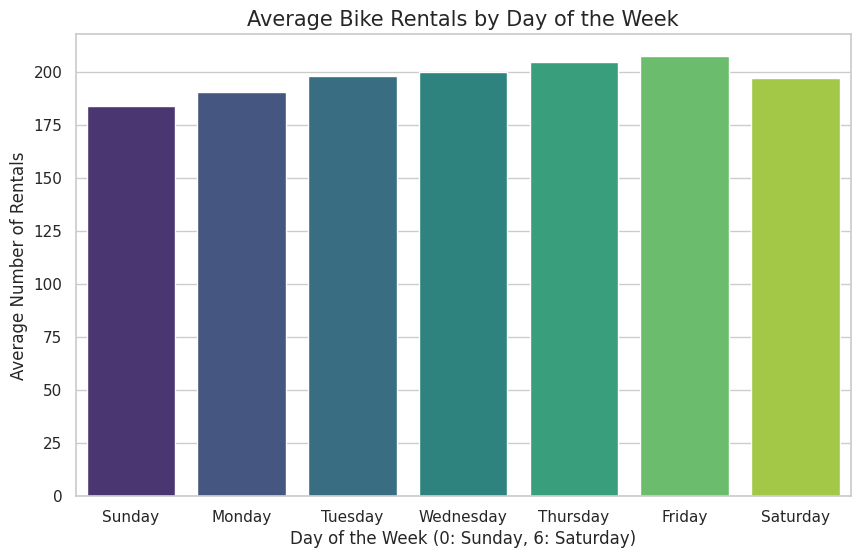

In [415]:
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_rentals.index, y=weekday_rentals.values, palette="viridis")
plt.title('Average Bike Rentals by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week (0: Sunday, 6: Saturday)', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

### Pertanyaan 3: - Apakah ada perbedaan besar dalam penyewaan sepeda antara weekday dan weekend?

<ipython-input-416-345ddde2c457>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Weekend', 'Weekdays'], y=weekend_rentals.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


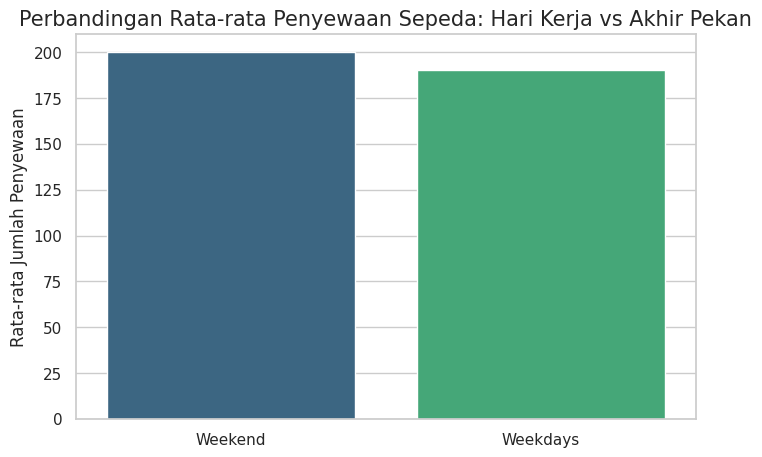

In [416]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Weekend', 'Weekdays'], y=weekend_rentals.values, palette="viridis")
plt.title('Perbandingan Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan', fontsize=15)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.show()

**Insight:**
- Setelah dilakukan visualisasi menjadi legih mudah melihat dan menjawab pertanyaan
- Mengidentifikasi jumlah penyewaan sepeda dalam sehari
- Mengidentifikasikan sepeda yang disewa perhari dalam seminggu
- Mengidentifikasikan perbedaan sewa antara weekdays dan weekend

## Conclusion


#Conclusion pertanyaan 1
Jumlah sepeda paling banyak diewa yaitu pada jam 17.00 . hal ini menunjukkan puncak penyewaan sepeda yang kemungkinan besar terkait dengan kegiatan harian seperti pulang sekolah maupun bekerja, ataupun untuk olahraga sore

#Conclusion pertanyaan 2
 Berdasarkan analisis jumlah penyewaan sepeda per hari dalam seminggu, hari dengan jumlah penyewaan sepeda tertinggi adalah hari Jumat. Hal ini mungkin menunjukkan bahwa pada hari Jumat dan Sabtu, banyak orang menggunakan sepeda untuk aktivitas akhir pekan, baik untuk perjalanan ke tempat kerja atau rekreasi.

 # Conclusion pertanyaan 3
Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada weekend dibandingkan dengan weekdays. Ini dapat dijelaskan oleh meningkatnya aktivitas rekreasi di kalangan masyarakat pada saat akhir pekan, di mana banyak orang memanfaatkan waktu luang mereka untuk berolahraga, bersantai, atau berkumpul dengan teman-teman.

In [417]:
all_df.to_csv("all_data.csv", index=False)